### 1.4 Synchronous SGD and asynchronous SGD Simulation

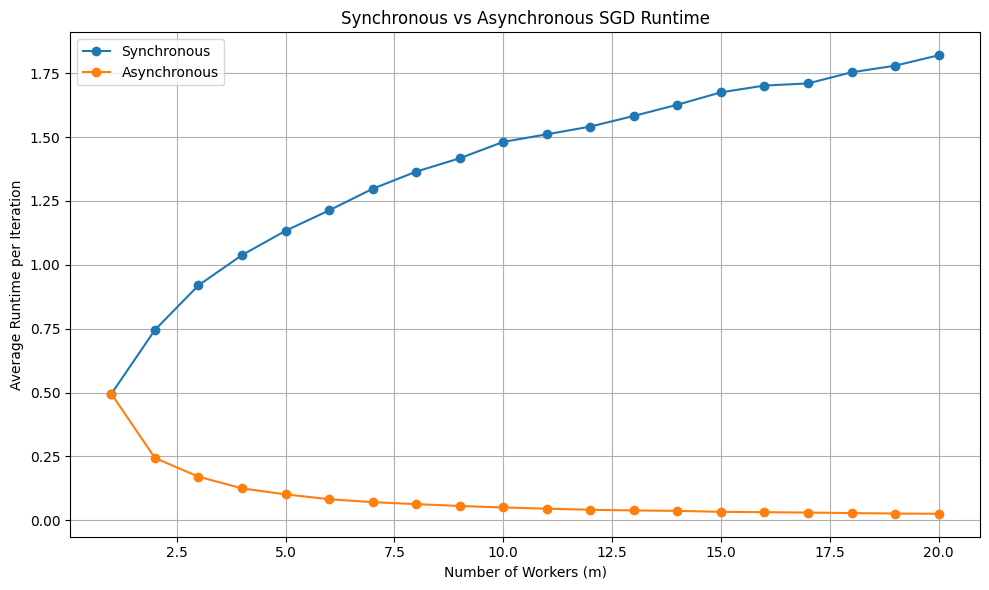

In [6]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

lambda_param = 2
num_iterations = 5000
m_values = np.arange(1, 21)

sync_runtimes = []
async_runtimes = []

for m in m_values:
    runtimes = np.random.exponential(scale=1/lambda_param, size=(num_iterations, m))

    sync_runtime = np.mean(np.max(runtimes, axis=1))
    sync_runtimes.append(sync_runtime)

    async_runtime = np.mean(np.min(runtimes, axis=1))
    async_runtimes.append(async_runtime)

plt.figure(figsize=(10, 6))
plt.plot(m_values, sync_runtimes, marker='o', label='Synchronous')
plt.plot(m_values, async_runtimes, marker='o', label='Asynchronous')
plt.xlabel('Number of Workers (m)')
plt.ylabel('Average Runtime per Iteration')
plt.title('Synchronous vs Asynchronous SGD Runtime')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Adding theoretical values

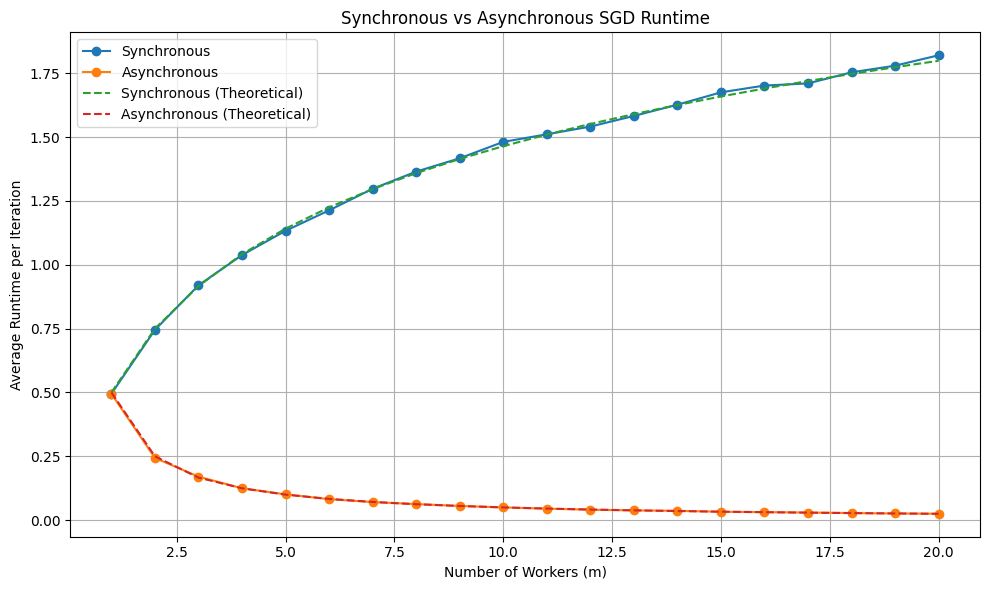

In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

lambda_param = 2
num_iterations = 5000
m_values = np.arange(1, 21)

sync_runtimes = []
async_runtimes = []

for m in m_values:
    runtimes = np.random.exponential(scale=1/lambda_param, size=(num_iterations, m))

    sync_runtime = np.mean(np.max(runtimes, axis=1))
    sync_runtimes.append(sync_runtime)

    async_runtime = np.mean(np.min(runtimes, axis=1))
    async_runtimes.append(async_runtime)

harmonic_numbers = np.cumsum(1 / m_values)
sync_theory = (1 / lambda_param) * harmonic_numbers
async_theory = 1 / (lambda_param * m_values)

plt.figure(figsize=(10, 6))
plt.plot(m_values, sync_runtimes, marker='o', label='Synchronous')
plt.plot(m_values, async_runtimes, marker='o', label='Asynchronous')
plt.plot(m_values, sync_theory, '--', label='Synchronous (Theoretical)')
plt.plot(m_values, async_theory, '--', label='Asynchronous (Theoretical)')
plt.xlabel('Number of Workers (m)')
plt.ylabel('Average Runtime per Iteration')
plt.title('Synchronous vs Asynchronous SGD Runtime')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
